In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Check the shape of the dataset
print('Shape of the dataset:', df.shape)

# Check the data types of the columns
print('\nData types of the columns:')
print(df.dtypes)

# Check for missing values
print('\nMissing values in each column:')
print(df.isnull().sum())

# Get a summary of the numerical columns
df.describe().astype(int)

Shape of the dataset: (200, 5)

Data types of the columns:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200,200,200,200
mean,100,38,60,50
std,57,13,26,25
min,1,18,15,1
25%,50,28,41,34
50%,100,36,61,50
75%,150,49,78,73
max,200,70,137,99


<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

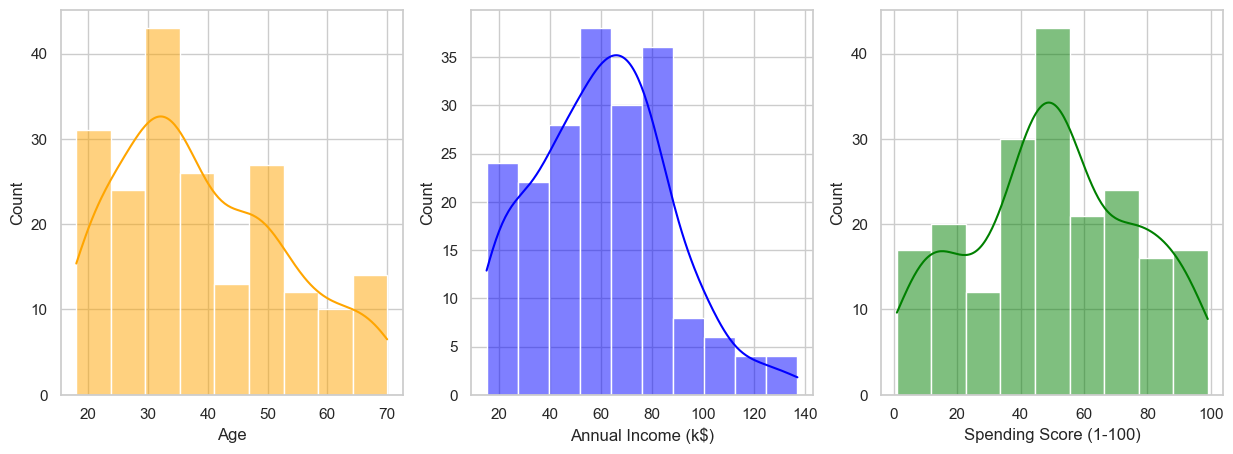

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the seaborn plot
sns.set(style='whitegrid')

# Create a figure and axis objects
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df, x='Age', kde=True, color='orange', ax=axs[0])
sns.histplot(data=df, x='Annual Income (k$)', kde=True, color='blue', ax=axs[1])
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, color='green', ax=axs[2])


[308812.77999999997, 212840.16982097187, 143342.75157170597, 104366.15145556198, 75350.77917248776, 58300.44332159069, 51116.986944634315, 44342.3173934174, 40623.36547212477, 37153.67212762972]


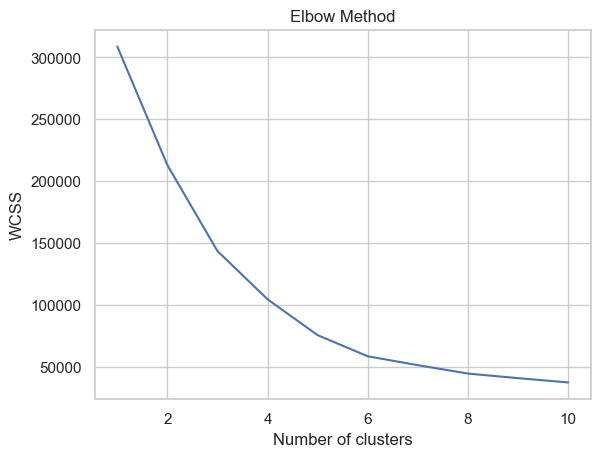

In [3]:
from sklearn.cluster import KMeans

# Select the features to use for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
print(wcss)
# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [4]:
# Create the KMeans model with the optimal number of clusters (assumed to be 5 based on the elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model to the data and predict the cluster labels
labels = kmeans.fit_predict(features)

# Add the cluster labels to the dataframe
df['Cluster'] = labels

# Display the first few rows of the dataframe with the cluster labels
df.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
95,96,Male,24,60,52,2
96,97,Female,47,60,47,2
97,98,Female,27,60,50,2
98,99,Male,48,61,42,2


In [5]:

                                       # Calculate the mean values of Age, Annual Income, and Score for each cluster
cluster_means = df.groupby('Cluster')[
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().astype(int)

# Display the cluster means
cluster_means

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,25,26,78
4,40,87,17


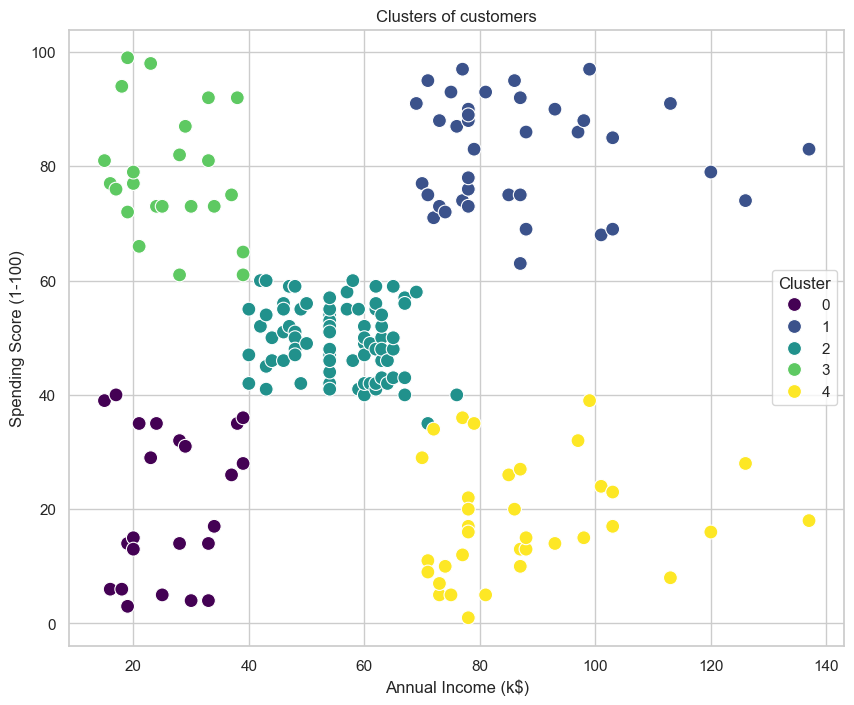

In [6]:
# Create a scatter plot of 'Annual Income (k$)' vs 'Spending Score (1-100)' colored by 'Cluster'
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)

# Add a title to the plot
plt.title('Clusters of customers')

# Display the plot
plt.show()

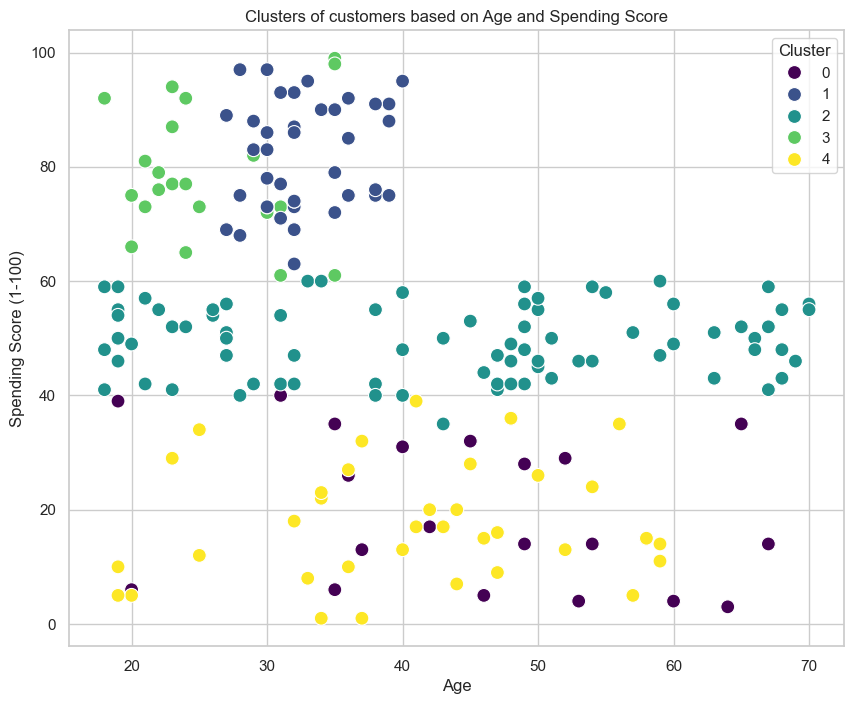

In [7]:
# Create a scatter plot of Age vs Spending Score 
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', 
palette='viridis', s=100)

# Add a title to the plot
plt.title('Clusters of customers based on Age and Spending Score')

# Display the plot
plt.show()

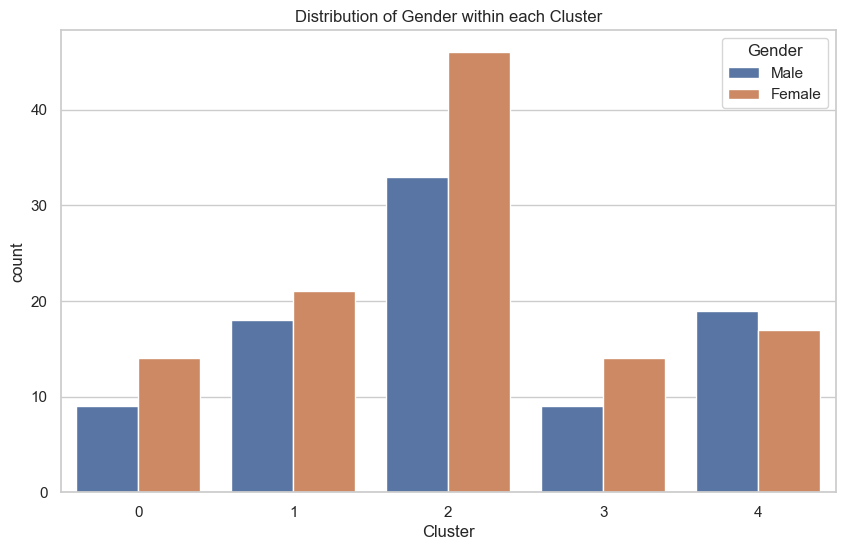

In [8]:
# Create a count plot to show the distribution of 'Gender' within each cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Gender')

# Add a title to the plot
plt.title('Distribution of Gender within each Cluster')

# Display the plot
plt.show()

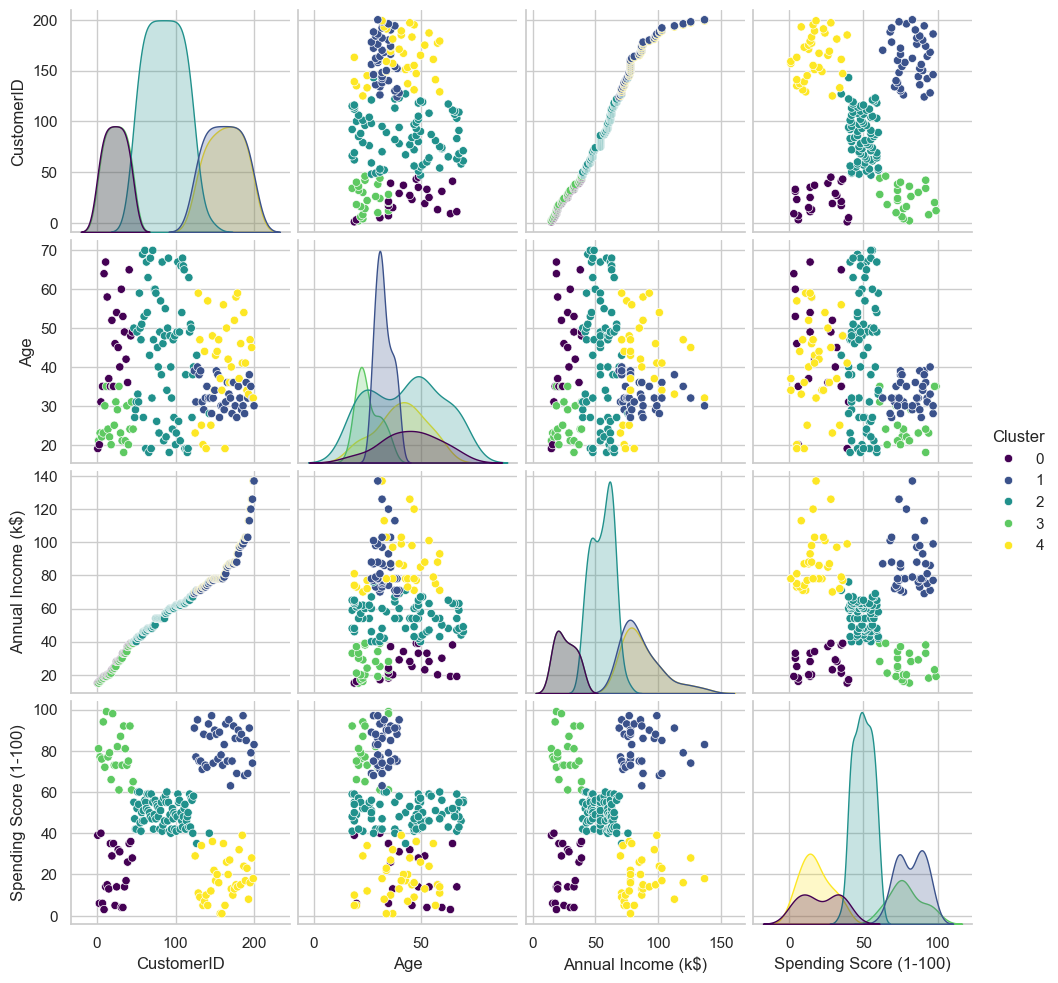

In [9]:
# Create a pairplot for relationships between the different features 
sns.pairplot(df, hue='Cluster', palette='viridis')

# Display the plot
plt.show()

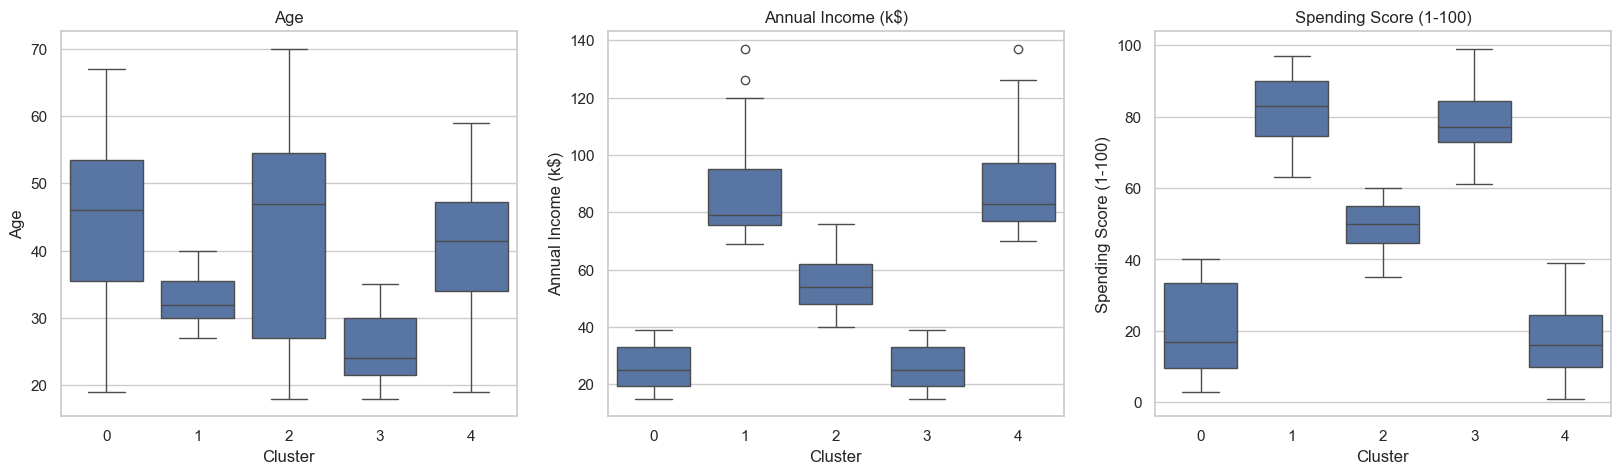

In [10]:
# Create a boxplot for each feature split by 'Cluster'
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Boxplot for 'Age'
sns.boxplot(data=df, x='Cluster', y='Age', ax=axs[0])
axs[0].set_title('Age')

# Boxplot for 'Annual Income (k$)'
sns.boxplot(data=df, x='Cluster', y='Annual Income (k$)', ax=axs[1])
axs[1].set_title('Annual Income (k$)')

# Boxplot for 'Spending Score (1-100)'
sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)', ax=axs[2])
axs[2].set_title('Spending Score (1-100)')

# Display the plots
plt.show()

In [11]:
# Import the necessary libraries
from sklearn.metrics import silhouette_score

# Compute the silhouette score for the clustering
silhouette_score = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']], df['Cluster'])

# Print the silhouette score
print('Silhouette Score: ', silhouette_score)

Silhouette Score:  0.44428597560893024


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features and transform them
scaled_features = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])

# Create a new KMeans object
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans object to the scaled features
kmeans.fit(scaled_features)

# Assign the cluster labels to a new column in the dataframe
df['Scaled_Cluster'] = kmeans.labels_

# Compute the silhouette score for the new clustering
scaled_silhouette_score = silhouette_score(scaled_features, df['Scaled_Cluster'])

# Print the silhouette score
print('Scaled Silhouette Score:', scaled_silhouette_score)

## Scaled Silhouette Score: 0.41664341513732767

Scaled Silhouette Score: 0.40846873777345605


In [13]:
# Import the necessary libraries
from sklearn.cluster import AgglomerativeClustering

# Create an AgglomerativeClustering object
agg_clustering = AgglomerativeClustering(n_clusters=5)

# Fit the AgglomerativeClustering object to the scaled features
agg_clustering.fit(scaled_features)

# Assign the cluster labels to a new column in the dataframe
df['Agg_Cluster'] = agg_clustering.labels_

# Compute the silhouette score for the new clustering
agg_silhouette_score = silhouette_score(scaled_features, df['Agg_Cluster'])

# Print the silhouette score
print('Agglomerative Clustering Silhouette Score: ', agg_silhouette_score)

# Agglomerative Clustering Silhouette Score:  0.39002826186267214

Agglomerative Clustering Silhouette Score:  0.39002826186267214


In [14]:
# Importing the necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Creating a PCA object with two components
pca = PCA(n_components=2)

# Fitting the PCA to the scaled features and transforming them
pca_features = pca.fit_transform(scaled_features)

# Creating a new KMeans object
kmeans = KMeans(n_clusters=5, random_state=42)

# Fitting the KMeans to the PCA features
kmeans.fit(pca_features)

# Assigning the cluster labels to a new column in the dataframe
df['PCA_Cluster'] = kmeans.labels_

# Calculating the silhouette score for the new clustering
pca_silhouette_score = silhouette_score(pca_features, df['PCA_Cluster'])

# Printing the silhouette score
print('PCA Silhouette Score: ', pca_silhouette_score)

# PCA Silhouette Score:  0.38981142807850383

PCA Silhouette Score:  0.38978616968277185


Applying dimensionality reduction techniques like PCA to a small dataset might not always be necessary, especially if the dataset only has a few features (columns) to begin with.

In [15]:
# Importing the necessary libraries
from sklearn.cluster import DBSCAN

# Creating a DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fitting the DBSCAN object to the PCA features
dbscan.fit(pca_features)

# Assigning the cluster labels to a new column in the dataframe
df['DBSCAN_Cluster'] = dbscan.labels_

# Calculating the silhouette score for the new clustering
dbscan_silhouette_score = silhouette_score(pca_features, df['DBSCAN_Cluster'])

# Printing the silhouette score
print('DBSCAN Silhouette Score: ', dbscan_silhouette_score)

# DBSCAN Silhouette Score:  0.3203118288175695

DBSCAN Silhouette Score:  0.32031182881756953


The silhouette score for DBSCAN is 0.3203. This is indeed lower than the silhouette scores obtained from the previous KMeans and Agglomerative clustering. A lower silhouette score indicates that the clusters are less dense and/or less well separated than in the previous clustering solutions.
It’s important to note that DBSCAN doesn’t necessarily optimize for the silhouette score, and it can find more complex, non-spherical clusters that other algorithms might miss. However, DBSCAN’s performance can be sensitive to the settings of its parameters, such as eps and min_samples.

In [21]:
# Grouping the data by cluster and calculating the mean of the original features

cluster_characteristics = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().astype(int)

# Displaying the characteristics of each cluster
cluster_characteristics

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,25,26,78
4,40,87,17


Cluster 0: “Conservative Middle-Aged” — This cluster tends to include middle-aged individuals (average age 45) with relatively low annual income (average $26k). Their spending score is also low (average 20), which suggests they might be more conservative with their spending, possibly due to their lower income. This group might be less responsive to marketing efforts aimed at increasing spending.


Cluster 1: “Young High Earners” — This cluster includes younger individuals (average age 32) with high annual income (average $86k). They also have a high spending score (average 82), indicating they spend a significant portion of their income. This group could be a key target for marketing campaigns, as they have both the means and the willingness to spend.


Cluster 2: “Balanced Middle-Aged” — This cluster is made up of middle-aged individuals (average age 43) with moderate annual income (average $55k). Their spending score is around the middle of the range (average 49), suggesting a balanced approach to spending. Marketing strategies for this group might need to focus on value and quality, as they might be more discerning with their spending.

Cluster 3: “Young Spenders” — This cluster includes young individuals (average age 25) with low annual income (average $26k), but their spending score is high (average 78). This suggests that these individuals, despite having lower income, are willing to spend a significant portion of it. They might be impulse buyers, or they might value experiences or products over saving money.


Cluster 4: “Wealthy Savers” — This cluster includes individuals around middle age (average age 40) with high annual income (average $87k), but their spending score is low (average 17). This suggests that despite their high income, they are conservative with their spending. Understanding why this group is not spending commensurate with their income could be a key insight. They might value saving, or they might not see value in the current offerings.